# Chapter 3 - Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

import tensorflow as tf
import tensorflow_probability as tfp

%matplotlib inline
plt.figure(figsize=(30, 20))
plt.style.use('seaborn-white')

<Figure size 2160x1440 with 0 Axes>

## 3.1 - linear regression with one variable

In [2]:
advertising = pd.read_csv('http://faculty.marshall.usc.edu/gareth-james/ISL/Advertising.csv', usecols=[1,2,3,4])
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


In [3]:
advertising.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
advertising.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
sales         22.1
Name: 0, dtype: float64

### Figure 3.1

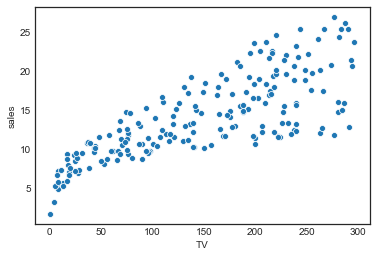

In [5]:
sns.scatterplot(x="TV", y="sales", data=advertising)

### Model

In [6]:
X = advertising['TV'][:, None]
y = advertising['sales']
X.shape, y.shape

((200, 1), (200,))

In [7]:
lr = skl_lm.LinearRegression(fit_intercept=True)

In [8]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
advertising["lr_predict"] = lr.predict(X)

In [10]:
advertising[["sales", "lr_predict"]]

,sales,lr_predict
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
...,...,...
195,7.6,8.848493
196,9.7,11.510545
197,12.8,15.446579
198,25.5,20.513985


#### Plot results

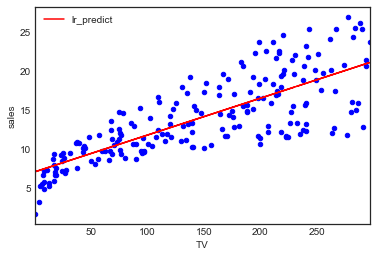

In [11]:
ax = advertising.plot(kind='scatter', x='TV', y='sales', color='b')
ax = advertising.plot(ax=ax, kind='line', x='TV', y='lr_predict', color='r')